Essayons de calculer une interpolation polynomiale grâce aux abscisses de Chebytecjcksqd de la fonction de Runge (c'est plus joli, j'avais essayé avec x^2 mais en vrai ca ne sert a rien puisque c'est déjà un polynome)

In [1]:
import numpy as np
from numpy.linalg import solve
from matplotlib import pyplot as plt
from math import cos,pi

In [20]:
n = 15

essayons de trouver les absisses de Chebytchev :

In [21]:
Xi = np.array([cos(((2*i+1)*pi)/(2*n+2)) for i in range(n)])
print(Xi)

[ 0.99518473  0.95694034  0.88192126  0.77301045  0.63439328  0.47139674
  0.29028468  0.09801714 -0.09801714 -0.29028468 -0.47139674 -0.63439328
 -0.77301045 -0.88192126 -0.95694034]


Nous allons ensuite calculer les coéficients de la matrice de Vandermond comme nous utiliserons des polynomes pour approximer

In [22]:
A = np.array([Xi**i for i in range(n)],dtype=np.float64).T
#print(A)

In [23]:
U = 1/(1+25*Xi**2)

a = solve(A,U)
x = np.linspace(-1,1,100)
App = np.polyval(a[::-1],x)

Y = 1/(1+25*x**2)
print("On vient bien que les abscisses ne sont pas équidistantes : ", Xi[0]-Xi[1], Xi[1]-Xi[2])


On vient bien que les abscisses ne sont pas équidistantes :  0.038244390939988104 0.07501907138385377


Et un joli petit plot ;-) 

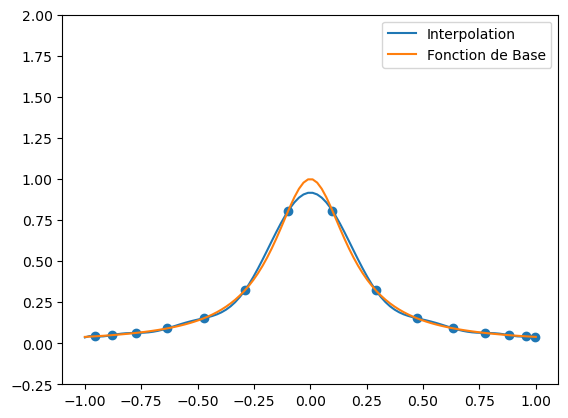

In [24]:
ax = plt.subplot(1, 1, 1)
ax.plot(x, App, label='Interpolation')
ax.plot(x, Y, label='Fonction de Base')

ax.scatter(Xi,U)
ax.legend()
plt.ylim([-0.25,2])
plt.show()

Calculate error :

In [25]:
e = App-Y

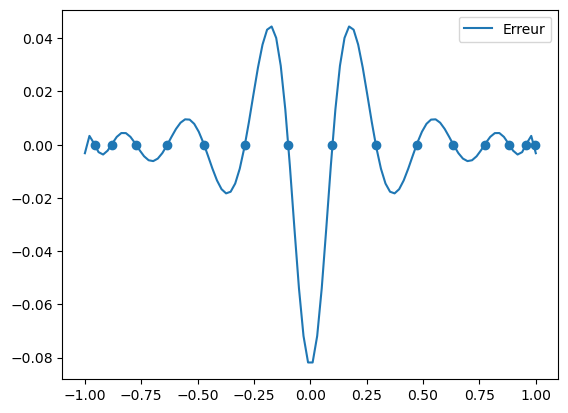

In [26]:
ax = plt.subplot(1, 1, 1)
ax.plot(x, e, label='Erreur')
ax.scatter(Xi,np.array([0 for i in range(len(Xi))]))
ax.legend()
#plt.ylim([-0.25,2])
plt.show()